In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = pd.DataFrame()
data['Population'] = [47,48,85,20,19,13,72,16,50,60]

sample_without_replacement = data['Population'].sample(n=5, replace=False)
sample_with_replacement = data['Population'].sample(n=5, replace=True)

In [2]:
sample_without_replacement

5    13
6    72
1    48
0    47
9    60
Name: Population, dtype: int64

In [3]:
sample_with_replacement

6    72
9    60
7    16
5    13
3    20
Name: Population, dtype: int64

In [4]:
print("Population mean: ", data['Population'].mean())
print("Population std: ", data['Population'].std(ddof=0))
print("Population variance: ", data['Population'].var(ddof=0))
print("Population size: ", data['Population'].shape[0])

Population mean:  43.0
Population std:  23.912339910598458
Population variance:  571.8
Population size:  10


# Don't need ddof for mean

In [5]:
print("Sample Mean: ", sample_without_replacement.mean())
print("Sample Std: ", sample_without_replacement.std(ddof=1))
print("Sample Variance: ", sample_without_replacement.var(ddof=1))  
print("Sample Size: ", sample_without_replacement.shape[0])

Sample Mean:  48.0
Sample Std:  22.056745000112777
Sample Variance:  486.5
Sample Size:  5


# Sample Mean and Vairance
-> How close is it to the population stats

In [6]:
Estsample = pd.DataFrame(np.random.normal(10, 5, size=30)) 
# 30 samples from a normal distribution with mean 10 and std 5 taken from a normal distribution
print('sample mean: ', Estsample.mean())
print('sample std: ', Estsample.std(ddof=1))

sample mean:  0    12.711387
dtype: float64
sample std:  0    4.265266
dtype: float64


# Learning Lessons
1. sample[0] is used to access the first column of the dataframe
2. For plt, the xlabel and ylabel needs to be keyed as separate lines

In [7]:
meanlist = []
varlist = []
for i in range(1000):
    sample = pd.DataFrame(np.random.normal(10, 5, size=30)) 
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

collection = pd.DataFrame()
collection['mean'] = meanlist
collection['variance'] = varlist

# Save a list of 1000 means and variances after taking 30 samples from a normal distribution with mean 10 and std 5


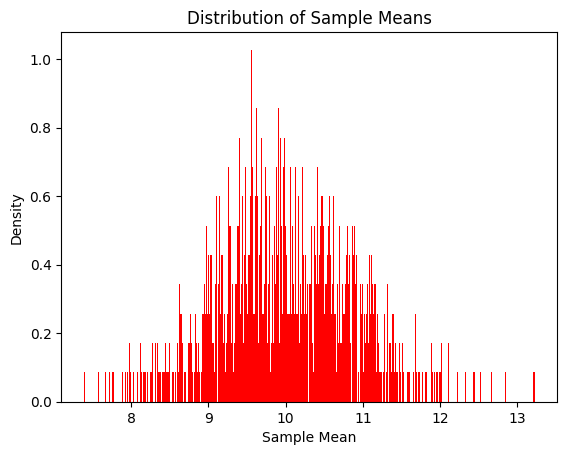

In [8]:
plt.hist(collection['mean'], bins=500, density=True, color='r')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

In [9]:
aapl = pd.read_csv('AAPL.csv',index_col=0, parse_dates=True)
aapl['logreturns'] = np.log(aapl['Close'].shift(-1))-np.log(aapl['Close'])

# Calculating 80% confidence interval for the mean of log returns
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)
sample_mean = aapl['logreturns'].mean()
sample_std = aapl['logreturns'].std(ddof=1)/(aapl.shape[0]**0.5)

In [10]:
interval_left = sample_mean + z_left * sample_std
interval_right = sample_mean + z_right * sample_std
print("80% confidence interval for the mean of log returns: ", (interval_left, interval_right))

80% confidence interval for the mean of log returns:  (np.float64(0.0003311673963183763), np.float64(0.001054779473696346))


# Understanding the Result
-> The result of the confidence interval is +ve
-> Likely that the returns are also +ve

# Video 4 Last Part of Module 3: Hypo Testing

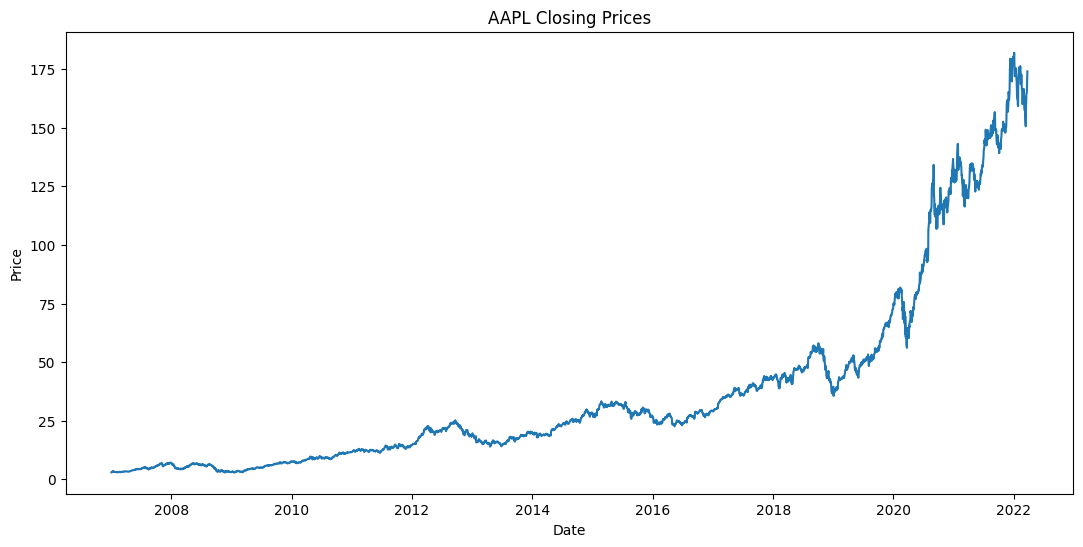

In [11]:
plt.figure(figsize=(13, 6))
plt.title('AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(aapl.loc['2007':,'Close'])
plt.show()

# Hypothesis Testing
-> Using Microsoft OHLC to test if average stock return is greater than 0

-> Two Options for this:
1. Two Tail Test (Test stat outside rejection region)
2. One Tail Test (Test stat)

Recap:
$H_0$ is the no-difference
$H_1$ is the claim we're testing

-> Small p-value (typically less than 0.05) indicates that the observed data is unlikely if the null hypothesis were true, leading to the rejection of the null hypothesis.
-> Large p-value suggests that the observed data is consistent with then null hypothesis and it is accepted

In [12]:
msft = pd.read_csv("MSFT.csv", index_col=0,parse_dates=True)


In [13]:
msft['logreturns'] = np.log(msft['Close'].shift(-1)) - np.log(msft['Close'])

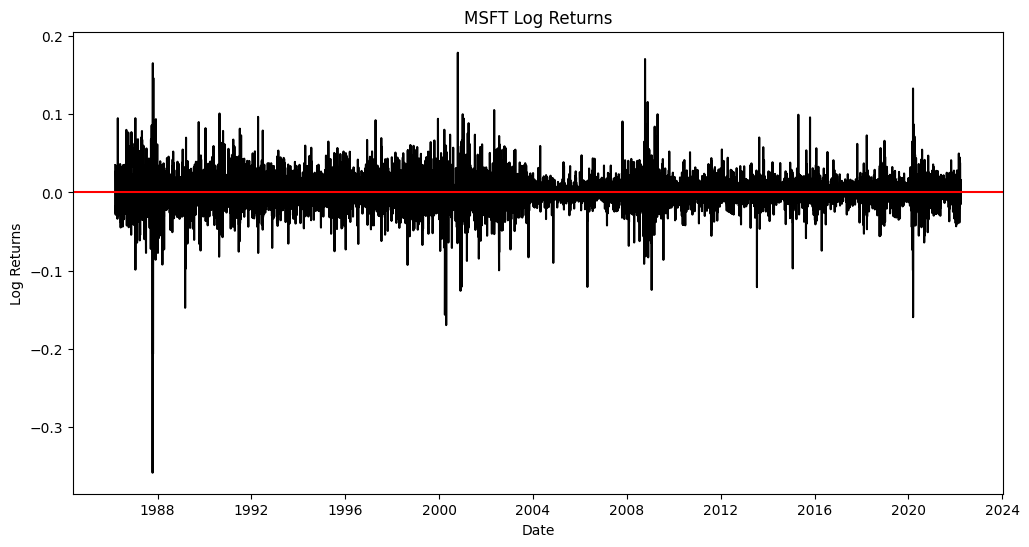

In [18]:
plt.figure(figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('MSFT Log Returns')
plt.plot(msft['logreturns'],color='black')
plt.axhline(y=0, color='red')
plt.show()

##### Setting a Hypothesis
$H_0: \mu = 0$
$H_1: \mu \neq 0$

In [31]:
sample_mean = msft['logreturns'].mean()
sample_std = msft['logreturns'].std(ddof=1)
n = msft['logreturns'].shape[0]

# Using mu = 0 under null hypothesis
z_hat = (sample_mean - 0) / (sample_std/(n**0.5))
print(round(z_hat, 6))

3.946632


In [ ]:
# Setting confidence level
alpha = 0.05

z_left = norm.ppf(alpha/2, 0 , 1) # Using the alpha values between 0 and 1
z_right = -z_left
print(z_left, z_right)

-1.9599639845400545 1.9599639845400545


In [40]:
print('At significance level of {}, shall we reject:'. format(alpha), z_hat < z_left or z_hat > z_right)

At significance level of 0.05, shall we reject: True


# More on Normal Distribution

##### Central Limit Theorem
1. Sum of large number of independent, identically distributed random variables tends towards a normal distribution
2. Mean and Variance of 3 independent variables is 
$3\mu$ and $3\sigma^2$

##### Why is n-1 used for sample variance
-> We are using the sample mean in place of the unknown population mean, the adjustment provides a more accurate and unbiased estimate of the population variance